In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.stats.multicomp as multi 
%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')


# Problem 1

In [3]:
df = pd.read_csv("SalaryData (1).csv")

In [4]:
df.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [5]:
df.shape

(40, 3)

In [68]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [70]:
df.duplicated().sum()

0

In [71]:
df.Education.unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [10]:
df.Occupation.unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [72]:
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


# 1.1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for Education.
𝐻0 : The means of 'Education' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Education' variable with respect to each Salary is unequal.

# 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [73]:
df.Education = pd.Categorical(df.Education)


In [74]:
df.Education.value_counts                    


<bound method IndexOpsMixin.value_counts of 0      Doctorate
1      Doctorate
2      Doctorate
3      Doctorate
4      Doctorate
5      Doctorate
6      Doctorate
7      Doctorate
8      Doctorate
9      Doctorate
10     Doctorate
11     Doctorate
12     Doctorate
13     Doctorate
14     Doctorate
15     Bachelors
16     Bachelors
17     Bachelors
18     Bachelors
19     Bachelors
20     Bachelors
21     Bachelors
22     Bachelors
23     Bachelors
24     Bachelors
25     Bachelors
26       HS-grad
27       HS-grad
28       HS-grad
29       HS-grad
30       HS-grad
31       HS-grad
32       HS-grad
33       HS-grad
34       HS-grad
35     Bachelors
36     Bachelors
37     Bachelors
38     Bachelors
39     Doctorate
Name: Education, dtype: category
Categories (3, object): [' Bachelors', ' Doctorate', ' HS-grad']>

In [14]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


# 1.1.2 State the null and the alternate hypothesis for conducting one-way ANOVA for Occupation.

𝐻0 : The means of 'Occupation' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Occupation' variable with respect to each Salary is unequal.

# 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [15]:
df.Occupation = pd.Categorical(df.Occupation)

In [16]:
df.Occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0         Adm-clerical
1         Adm-clerical
2         Adm-clerical
3         Adm-clerical
4                Sales
5                Sales
6                Sales
7                Sales
8                Sales
9       Prof-specialty
10      Prof-specialty
11      Prof-specialty
12      Prof-specialty
13      Prof-specialty
14      Prof-specialty
15        Adm-clerical
16        Adm-clerical
17        Adm-clerical
18      Prof-specialty
19      Prof-specialty
20      Prof-specialty
21      Prof-specialty
22               Sales
23               Sales
24               Sales
25               Sales
26               Sales
27               Sales
28               Sales
29        Adm-clerical
30        Adm-clerical
31        Adm-clerical
32      Prof-specialty
33      Prof-specialty
34      Prof-specialty
35     Exec-managerial
36     Exec-managerial
37     Exec-managerial
38     Exec-managerial
39     Exec-managerial
Name: Occupation, dtype: category
Ca

In [17]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


# 1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

In [18]:
McEducation = multi.MultiComparison(df['Salary'], df['Education'])
Results = McEducation.tukeyhsd()
print(Results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


# 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

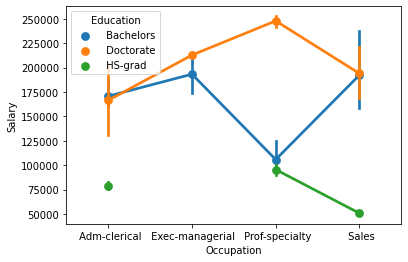

In [19]:
sns.pointplot(x="Occupation",y="Salary",data=df,hue="Education")

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

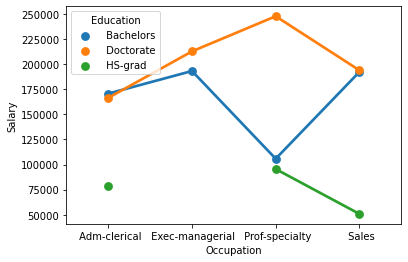

In [20]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None)

# 1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [21]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


 𝐻0 : There is no interaction between factors  of Occupation and Education.

𝐻1 :  there is an interaction between factors  of Occupation and Education.



In [22]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN  


# 1.7 Explain the business implications of performing ANOVA for this particular case study
By performing One way test between Education and Occupation with respect to Salary We found that different in the means of Education with Salary variable and constant means of Occupation with respect to salary And by Two way Anova test between Education and Occupation we found that there are some sort of interaction between factor of Education and Occupation.

# Problem 2:

In [23]:
#Read the data
df = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [24]:
#Check the first few observations
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [27]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

# 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


In [28]:
df_1 = df.select_dtypes(["float","int64"])
df_1
list_col = df_1.columns


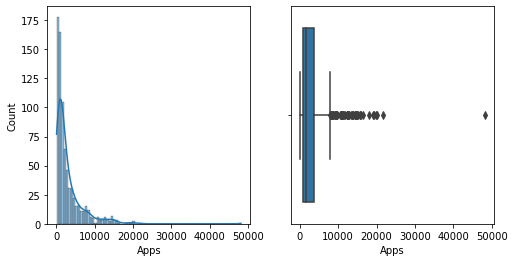

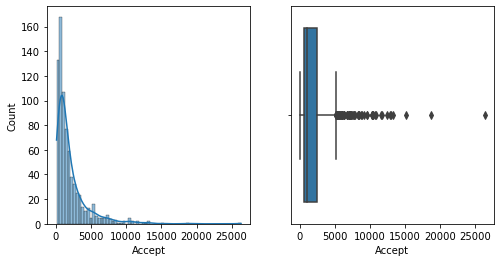

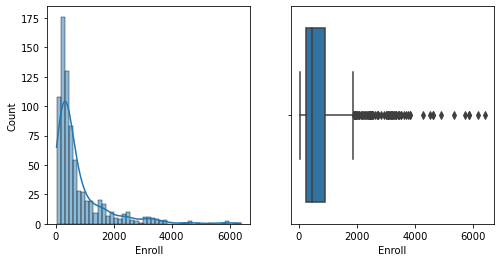

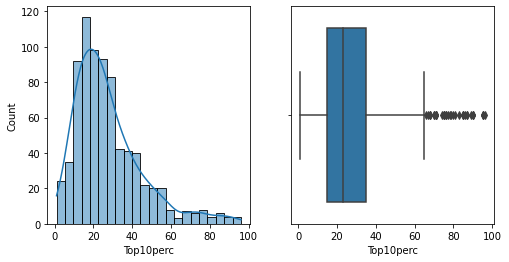

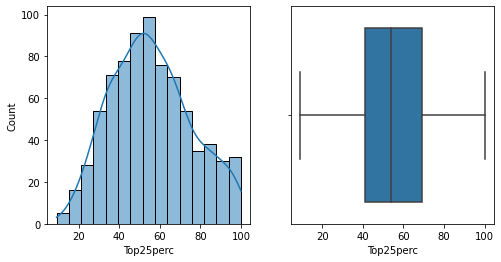

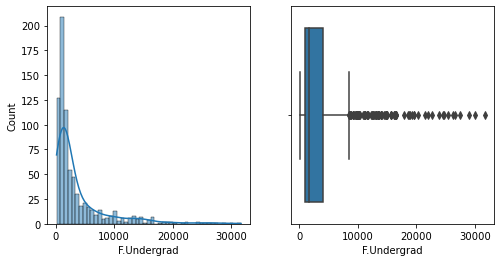

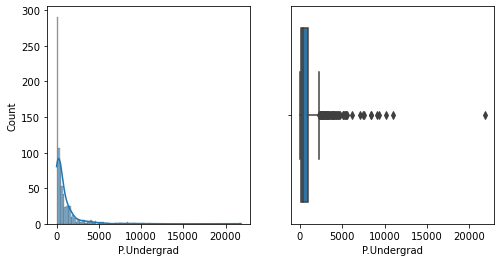

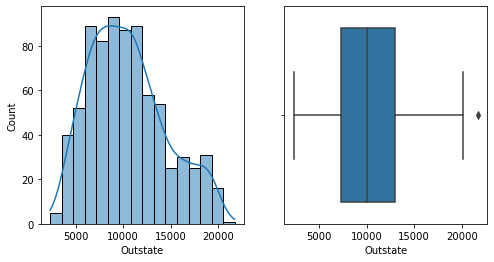

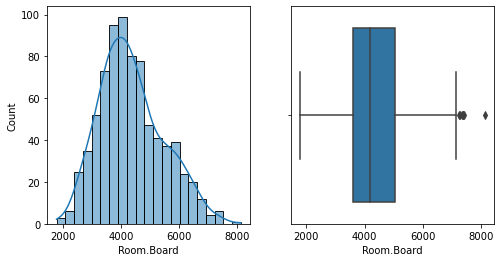

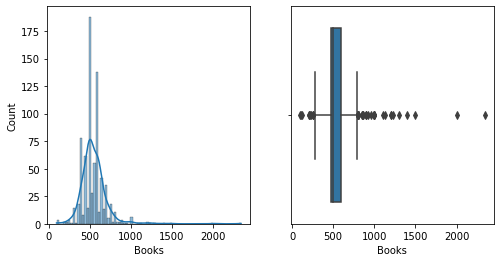

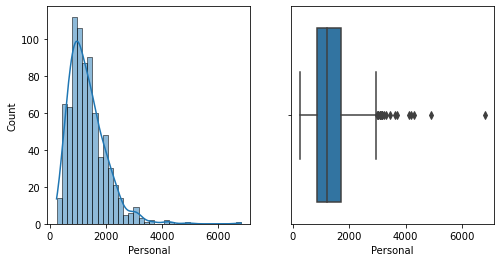

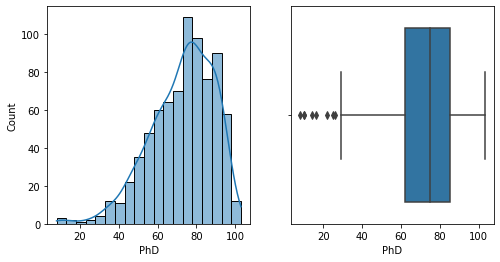

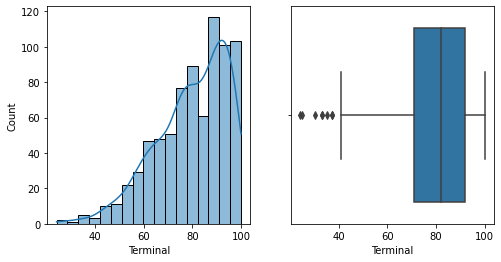

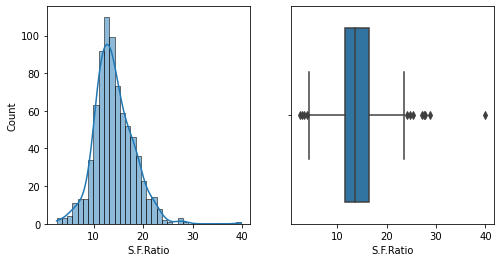

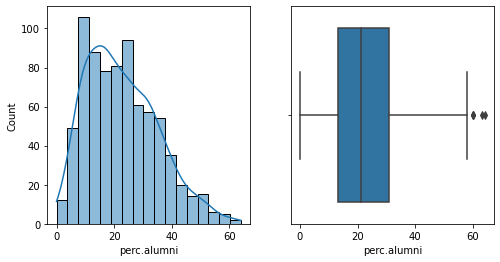

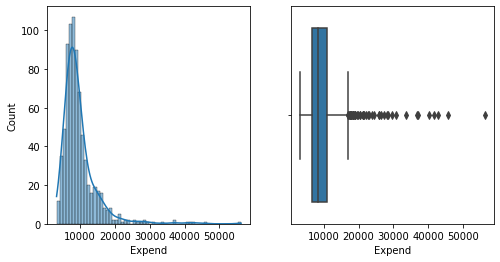

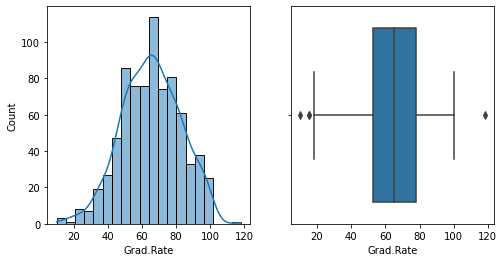

In [29]:
for i in list_col:
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(x=df_1[i],kde=True,data=df_1, ax=axs[0])
    sns.boxplot(x=df_1[i],data=df_1, ax=axs[1])
    plt.show()

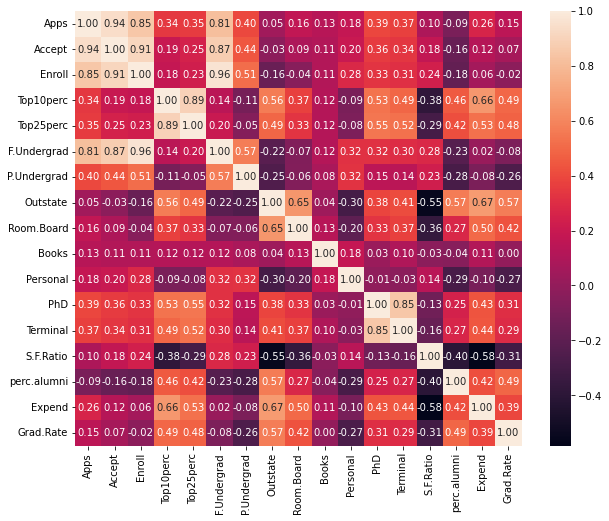

In [30]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f');

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.
Since the data has been scale in different manner for different column we have to scale data. For particular this dataset we will go for z-score scaling .It will help to better model building and analysis.

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [31]:
x = df_1.iloc[:,0:].values
x

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [2.0970e+03, 1.9150e+03, 6.9500e+02, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0705e+04, 2.4530e+03, 1.3170e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [2.9890e+03, 1.8550e+03, 6.9100e+02, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

In [32]:
np.shape(x)

(777, 17)

In [33]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [34]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0

In [35]:
# correlation matrix
df_1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [36]:
#Scale the data
from scipy.stats import zscore
df_1_scaled = df_1.apply(zscore)

In [37]:
#Check the data post scaling
df_1_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?


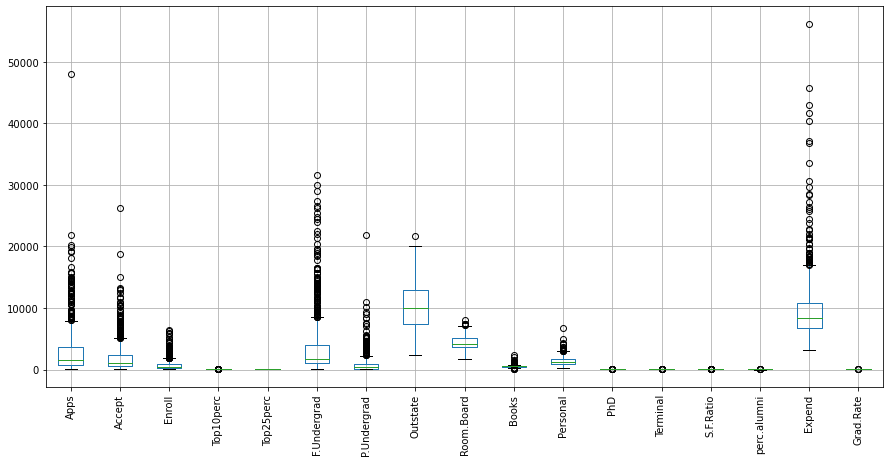

In [38]:
# boxplot before scaling
df.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

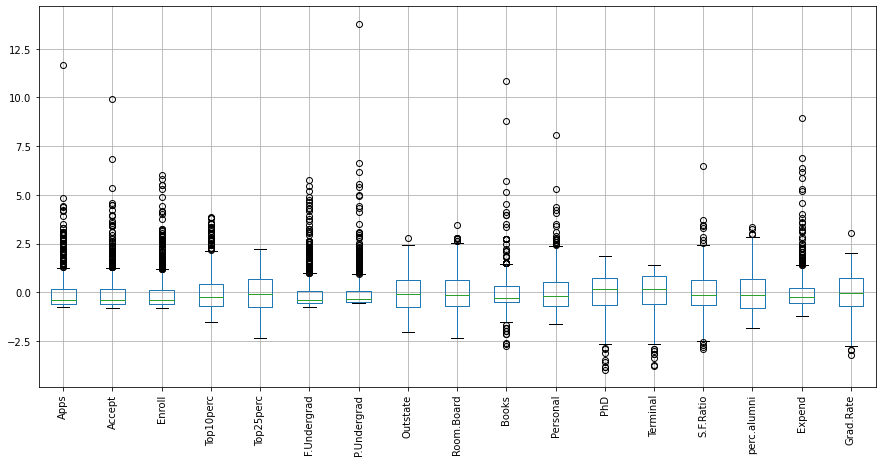

In [39]:
# boxplot after scaling
df_1_scaled.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

# 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]


In [40]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [41]:
feature_list = df_1_scaled.columns

In [42]:
#Check to verify if outliers have been treated
for i in feature_list:
    LL, UL = remove_outlier(df_1_scaled[i])
    df_1_scaled[i] = np.where(df_1_scaled[i] > UL, UL, df_1_scaled[i])
    df_1_scaled[i] = np.where(df_1_scaled[i] < LL, LL, df_1_scaled[i])

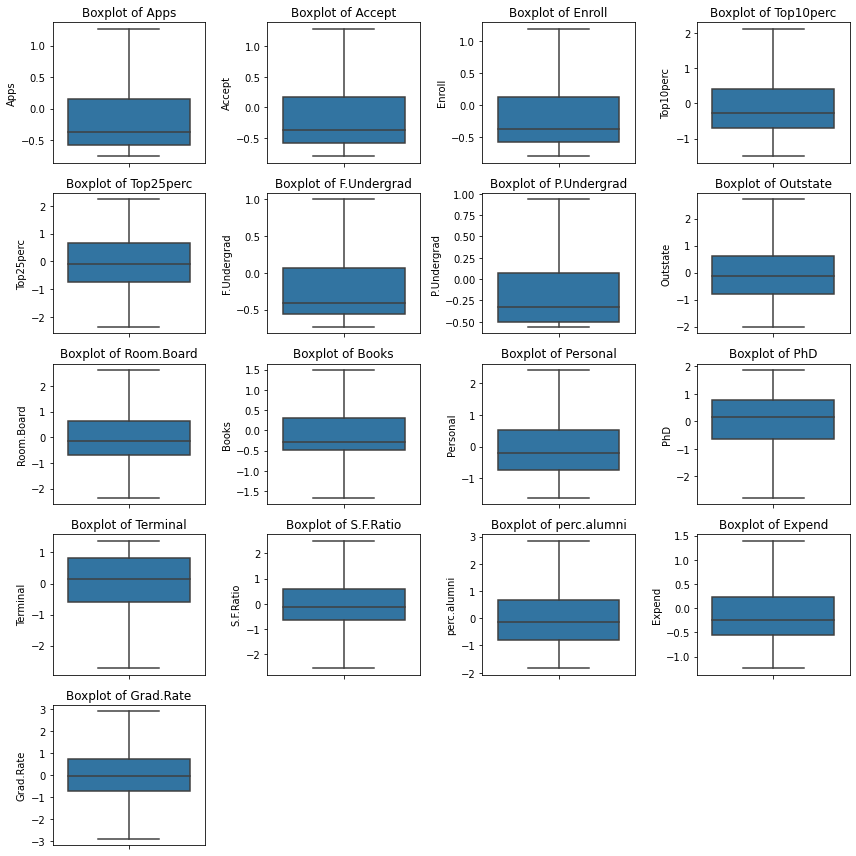

In [43]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,12))
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_1_scaled[feature_list[i]], data = df_1_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [44]:
#Check the descriptive stats to observe scale issues between the variables
df_1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,-1.112508e-01,0.626261,-0.755134,-0.575441,-0.373254,0.160912,1.265442
Accept,777.0,-1.112553e-01,0.621867,-0.794764,-0.577581,-0.371011,0.165417,1.279914
Enroll,777.0,-1.287822e-01,0.613978,-0.802273,-0.579351,-0.372584,0.131413,1.197559
Top10perc,777.0,-4.059064e-02,0.883915,-1.506526,-0.712380,-0.258583,0.422113,2.123854
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.576671e-01,0.557059,-0.734617,-0.558643,-0.411138,0.062941,0.995316
P.Undergrad,777.0,-1.310685e-01,0.470783,-0.561502,-0.499719,-0.330144,0.073418,0.933123
Outstate,777.0,-1.176425e-04,1.000320,-2.014878,-0.776203,-0.112095,0.617927,2.709123
Room.Board,777.0,-1.905272e-03,0.995142,-2.351778,-0.693917,-0.143730,0.631824,2.620437
Books,777.0,-6.033340e-02,0.698366,-1.662924,-0.481099,-0.299280,0.306784,1.488609


In [45]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_1_scaled)
p_value

0.0

In [46]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_1_scaled)
kmo_model


C:\Users\Neha Mishra\AppData\Roaming\Python\Python39\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.84946246682314

In [47]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_1_scaled)

In [48]:
#Extract eigen vectors
pca.components_

array([[ 0.0929684 ,  0.06592707,  0.03166929,  0.33452816,  0.36427546,
         0.01149875, -0.04622402,  0.37830181,  0.29777508,  0.0401252 ,
        -0.10944135,  0.31241468,  0.31563577, -0.238936  ,  0.28566756,
         0.24699418,  0.31117828],
       [ 0.32104652,  0.3319699 ,  0.35033549,  0.06754279,  0.13142781,
         0.32452837,  0.20972858, -0.20665209, -0.07383062,  0.13395669,
         0.29386253,  0.30728219,  0.28923834,  0.27738993, -0.26160327,
        -0.02920582, -0.12680266],
       [ 0.06660652,  0.07883241,  0.01381154, -0.32328505, -0.41399578,
         0.02193807,  0.1038968 ,  0.2446006 ,  0.65435548,  0.06932308,
         0.02906196,  0.01051885,  0.07534077, -0.19726187, -0.35032544,
         0.14253472, -0.14343185],
       [-0.0129432 , -0.03420729, -0.01122623,  0.21141739,  0.19443136,
        -0.01744947, -0.02676078,  0.02000679, -0.07736692,  0.29066279,
         0.60616613, -0.21336602, -0.22034156, -0.50833033, -0.05443422,
         0.17754101

In [49]:
#Check the eigen values
pca.explained_variance_


array([4.75579369, 2.3800885 , 0.88497491, 0.81453646, 0.72423975,
       0.52688069, 0.47958062, 0.41127635, 0.36620193, 0.23942458,
       0.12943793, 0.09751277, 0.08189987, 0.06059116, 0.03582106,
       0.01435481, 0.00793972])

In [50]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([4.75579369, 2.3800885 , 0.88497491, 0.81453646, 0.72423975,
       0.52688069, 0.47958062, 0.41127635, 0.36620193, 0.23942458,
       0.12943793, 0.09751277, 0.08189987, 0.06059116, 0.03582106,
       0.01435481, 0.00793972])

In [51]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.39596786, 0.19816641, 0.0736831 , 0.06781839, 0.06030027,
       0.04386814, 0.03992993, 0.03424291, 0.03049001, 0.01993451,
       0.01077702, 0.00811892, 0.00681899, 0.00504483, 0.00298246,
       0.00119518, 0.00066106])

In [52]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9',
                                                'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17'],
                                    )


In [53]:
round(df_extracted_loadings,2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.09,0.32,0.07,-0.01,0.25,0.01,-0.24,0.13,0.02,0.03,-0.04,-0.22,-0.11,0.01,0.56,0.59,-0.14
1,0.07,0.33,0.08,-0.03,0.23,0.02,-0.27,0.13,0.02,0.06,-0.01,-0.18,-0.15,-0.00,0.27,-0.71,0.32
2,0.03,0.35,0.01,-0.01,0.19,0.03,-0.27,0.12,0.01,0.01,0.01,-0.04,-0.02,-0.03,-0.49,-0.13,-0.70
3,0.33,0.07,-0.32,0.21,0.08,-0.32,0.10,-0.02,-0.13,0.01,-0.09,-0.14,0.30,-0.69,0.01,-0.02,0.03
4,0.36,0.13,-0.41,0.19,0.12,-0.38,0.19,-0.02,-0.18,-0.13,0.13,0.18,-0.30,0.51,-0.00,-0.02,-0.01
5,0.01,0.32,0.02,-0.02,0.15,0.02,-0.21,0.10,0.01,-0.03,0.02,0.06,0.05,0.01,-0.55,0.35,0.62
6,-0.05,0.21,0.10,-0.03,0.07,0.00,-0.09,0.05,-0.04,-0.13,0.09,0.87,0.25,-0.14,0.24,-0.04,-0.05
7,0.38,-0.21,0.24,0.02,0.05,0.05,-0.05,0.02,-0.18,0.76,0.06,0.22,-0.27,-0.10,-0.07,0.05,0.00
8,0.30,-0.07,0.65,-0.08,0.21,-0.06,0.32,0.12,-0.33,-0.43,-0.06,-0.09,-0.02,-0.02,-0.07,-0.01,-0.01
9,0.04,0.13,0.07,0.29,0.05,0.08,0.50,0.48,0.61,0.11,-0.04,0.05,-0.05,-0.03,-0.02,-0.01,-0.00


# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]
The linear equation for 1st component : PC1=0.09Apps+0.07Accept+0.03Enroll+0.33Top10perc+0.01F.Undergrad -0.05P.Undergrad-0.38Outstate+0.30Room.Board+0.04Books-0.11Personal +0.31PhD+0.32Terminal-0.24S.F.Ratio+0.29perc.alumni+0.25Expend+0.31Grad.Rat

# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs

np.cumsum(pca.explained_variance_ratio_)


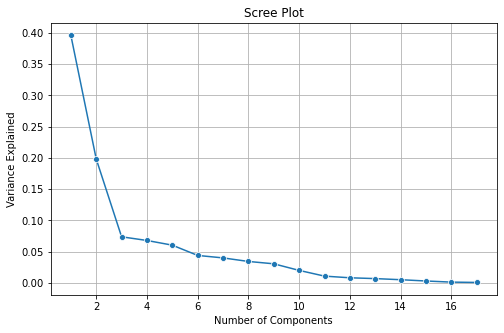

In [54]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [55]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]


In [56]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
0,0.092968,0.321047,0.066607,-0.012943,0.246748
1,0.065927,0.331970,0.078832,-0.034207,0.228775
2,0.031669,0.350335,0.013812,-0.011226,0.191149
3,0.334528,0.067543,-0.323285,0.211417,0.077417
4,0.364275,0.131428,-0.413996,0.194431,0.117971
5,0.011499,0.324528,0.021938,-0.017449,0.150299
6,-0.046224,0.209729,0.103897,-0.026761,0.069900
7,0.378302,-0.206652,0.244601,0.020007,0.046406
8,0.297775,-0.073831,0.654355,-0.077367,0.205895
9,0.040125,0.133957,0.069323,0.290663,0.054402


# 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

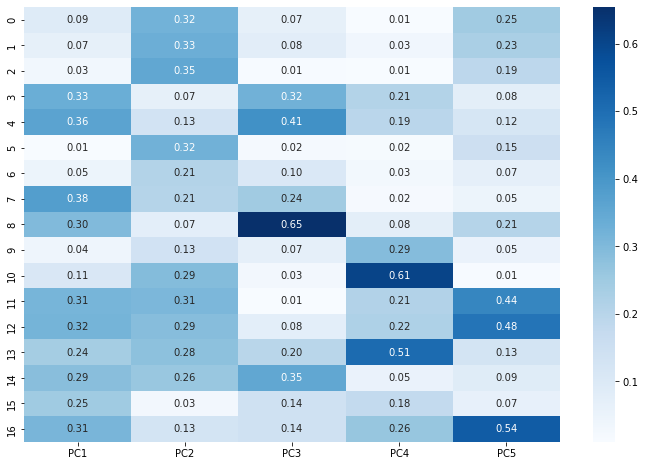

In [57]:
# Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

# The End...............